# Fake Tweets vs Real

Libraries. 

In [1]:
import re
import nltk 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

Importing options.

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Importing files.

In [3]:
train  = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

Overview of the training data.

In [4]:
print(train.head())

   id keyword location  \
0   1     NaN      NaN   
1   4     NaN      NaN   
2   5     NaN      NaN   
3   6     NaN      NaN   
4   7     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

  

In [5]:
# Non Disaster tweets
train[train['target'] == 0].head(10)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


In [6]:
# Disaster tweets
train[train['target'] == 1].head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [7]:
#Dimensions
train.shape, test.shape

((7613, 5), (3263, 4))

In [8]:
# Label Distribution
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

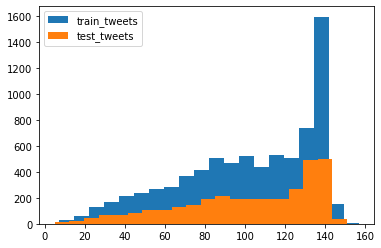

In [9]:
# train vs test data Distribution
length_train = train['text'].str.len() 
length_test = test['text'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [10]:
# Appending the train data to the test data
combi = train.append(test, ignore_index=True) 
combi.shape

(10876, 5)

In [11]:
# Removing unwanted pattern from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [12]:
# Removing @
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*") 
combi.head()

,id,keyword,location,text,target,tidy_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,"13,000 people receive #wildfires evacuation orders in California"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school


In [13]:
# Removing #
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,keyword,location,text,target,tidy_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,people receive #wildfires evacuation orders in California
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1.0,#RockyFire Update California Hwy closed in both directions due to Lake County fire #CAfire #wildfires
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1.0,#flood #disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1.0,I m on top of the hill and I can see a fire in the woods
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1.0,There s an emergency evacuation happening now in the building across the street
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1.0,I m afraid that the tornado is coming to our area


In [14]:
# Removing short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,keyword,location,text,target,tidy_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,Deeds Reason this #earthquake ALLAH Forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,residents asked shelter place being notified officers other evacuation shelter place orders expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,people receive #wildfires evacuation orders California
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,Just sent this photo from Ruby #Alaska smoke from #wildfires pours into school


In [15]:
# Text Normalisation
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                                                                    [Deeds, Reason, this, #earthquake, ALLAH, Forgive]
1                                                                             [Forest, fire, near, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, being, notified, officers, other, evacuation, shelter, place, orders, expected]
3                                                         [people, receive, #wildfires, evacuation, orders, California]
4                          [Just, sent, this, photo, from, Ruby, #Alaska, smoke, from, #wildfires, pours, into, school]
Name: tidy_tweet, dtype: object

In [16]:
# Normalise the tokenized tweet
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [17]:
# stemming
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

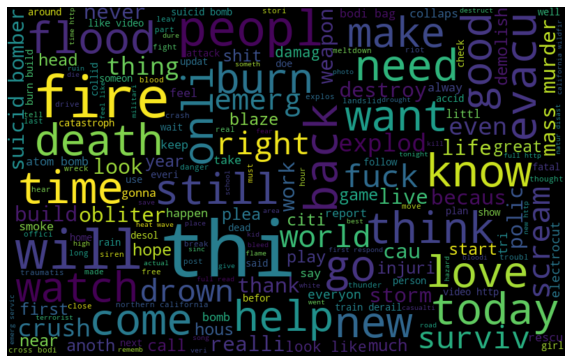

In [18]:
# WordCloud

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

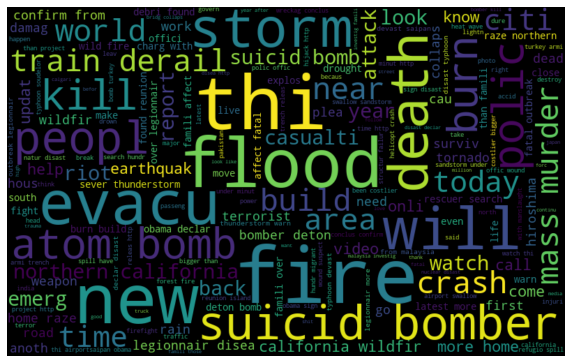

In [19]:
# Disaster tweets

negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['target'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


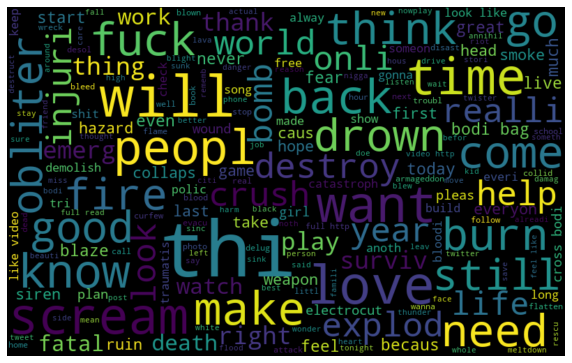

In [20]:
# Non disaster tweets

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.savefig('Non_disaster.png', bbox_inches='tight')
plt.show()

In [21]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)       
        hashtags.append(ht)     
    return hashtags   

In [22]:
# extracting hashtags from non disaster tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['target'] == 0]) 

In [23]:
# extracting hashtags from disaster tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['target'] == 1]) 

In [24]:
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

In [25]:
# Non Disaster Tweets

a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 

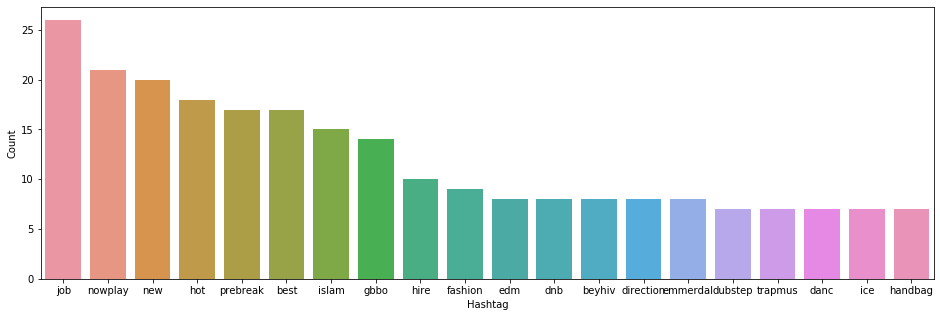

In [26]:
# selecting top 20 most frequent hashtags 

d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.savefig("Non_disaster_plot")
plt.show()

In [27]:
# Disaster Tweets
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 

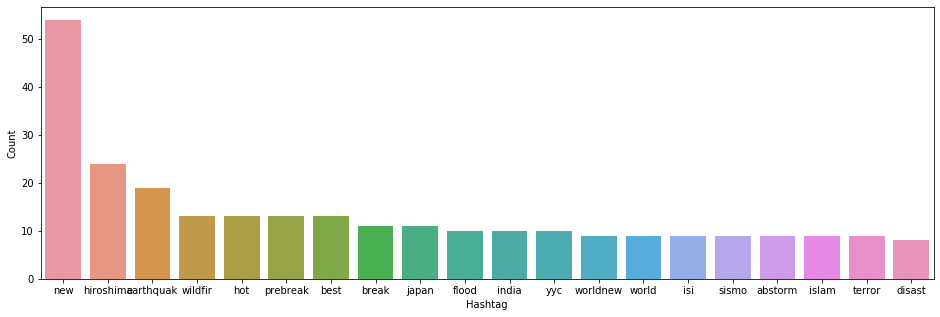

In [28]:
# selecting top 20 most frequent hashtags 

e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
plt.savefig("disaster_tweets_plot")

In [29]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer 
import gensim

In [30]:
# Building a model classification matrix
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(10876, 1000)

In [31]:
# Word2Vec
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

In [32]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1683622, 2136220)

In [33]:
model_w2v.wv.most_similar(positive="flood")

[('flash', 0.5799164175987244),
 ('bengal', 0.537699282169342),
 ('#flood', 0.5287426710128784),
 ('mamata', 0.5197890996932983),
 ('banerje', 0.5102245807647705),
 ('myanmar', 0.5019756555557251),
 ('inch', 0.487399697303772),
 ('monsoon', 0.48552024364471436),
 ('#disast', 0.4788340628147125),
 ('heavi', 0.47527921199798584)]

In [34]:
model_w2v.wv.most_similar(positive="rain")

[('heavi', 0.7664806842803955),
 ('incess', 0.7324212193489075),
 ('manipur', 0.7117856740951538),
 ('monsoon', 0.6718904376029968),
 ('frequent', 0.6695336103439331),
 ('#cdnpoli', 0.6517339944839478),
 ('closer', 0.6432884931564331),
 ('gusti', 0.6424693465232849),
 ('spong', 0.631699800491333),
 ('venic', 0.6233444213867188)]

In [35]:
model_w2v['storm']

array([ 0.08195436, -0.04604264, -0.19755855,  0.21212877,  0.36020163,
        0.4375432 ,  0.01628444,  0.32573918, -0.5031292 , -0.41356274,
        0.7487871 ,  0.3341661 ,  0.8587624 ,  0.46818304,  0.28637984,
       -0.14547977, -0.6964319 ,  0.05611222, -0.16190779, -0.46385953,
        0.5901767 ,  0.23839277,  0.09181947,  1.1644012 ,  0.5375868 ,
       -0.07283448, -0.66218835, -0.13856043,  0.39910153,  0.00147654,
       -0.8862493 ,  0.0756894 ,  0.06220942,  0.30084506,  0.2318879 ,
       -0.8970721 ,  0.26109192,  0.00527108, -0.80440426, -0.539389  ,
       -0.24863839, -0.2500985 ,  0.22703378, -0.38320708,  0.4105984 ,
        0.03550077,  0.29894406,  0.16389477,  0.05355559, -0.6491247 ,
       -0.37098482, -0.63003534,  0.02641349, -0.44264972,  0.4845547 ,
        0.31075895,  0.6954391 ,  0.35014877,  0.5894619 ,  0.20288654,
        0.10675097, -0.8765188 , -0.7814084 , -0.3807786 ,  0.26955894,
       -0.32920852,  0.2152995 , -0.20175578,  0.08167581,  0.44

In [36]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [37]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [38]:
# Word2Vec
#from tqdm 
import tqdm #tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [39]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [40]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   dm_mean=1, # dm = 1 for using mean of the context word vectors                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [42]:
# Bag of words features

# Extracting train and test BoW features 
train_bow = bow[:7613,:] 
test_bow = bow[7613:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['target'], random_state=42,test_size=0.3)

In [43]:
# XGB Classifier on training data

from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.7346711259754738

In [44]:
# XBG Classifier on test data

test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 

Importing Covid-19 Tweets

In [45]:
covid_tweet= pd.read_csv('COVID.csv')

In [46]:
covid_tweet

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,"World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says ""I found most of what [Trump] s...",Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activist Sean Brennan. LAM has toured the world &amp; influenced many artists.",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\n\n#TDS",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #Trump2020 #2ASupporter #TrustThePlan",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https://t.co/PFESx4ePpD",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly stopped being funny. (helenkennedy@gmail),Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. Past president: @fccjapan, @SeoulFCC. Ex @AP, @Discovery. 📡",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/1204309839004012544,10 Dec 2019 08:00:15,"El #coronavirus entérico felino es un virus intestinal altamente contagioso que puede mutar a peritonitis infecciosa felina, una de las #enfermedades más letales en #gatos domésticos. #veterinaria...",Tweet,Hootsuite Inc.,0,0,NaN,NaN,...,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de compañía,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212528810729479,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!\n\nPS, this is my life philosophy\n\n#Q #DevilSticks #TimAndEricDotCom #Matthew #ChinaVirus #WeveBeenHacked https://t.co/KQpLqorNau",ReTweet,Twitter for Android,0,0,NaN,NaN,...,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half

In [47]:
covid_tweet['Tweet Content'] 
covid_tweet.shape

(60160, 22)

In [48]:
# Removing @
covid_tweet['Tweet Content'] = np.vectorize(remove_pattern)(covid_tweet['Tweet Content'], "@[\w]*") 
covid_tweet

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,"World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says ""I found most of what [Trump] s...",Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activist Sean Brennan. LAM has toured the world &amp; influenced many artists.",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\n\n#TDS",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #Trump2020 #2ASupporter #TrustThePlan",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https://t.co/PFESx4ePpD",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly stopped being funny. (helenkennedy@gmail),Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments now from here. https://t.co/l45e8bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. Past president: @fccjapan, @SeoulFCC. Ex @AP, @Discovery. 📡",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/1204309839004012544,10 Dec 2019 08:00:15,"El #coronavirus entérico felino es un virus intestinal altamente contagioso que puede mutar a peritonitis infecciosa felina, una de las #enfermedades más letales en #gatos domésticos. #veterinaria...",Tweet,Hootsuite Inc.,0,0,NaN,NaN,...,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de compañía,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212528810729479,10 Dec 2019 01:33:34,"RT : It's my party, you're invited!\n\nPS, this is my life philosophy\n\n#Q #DevilSticks #TimAndEricDotCom #Matthew #ChinaVirus #WeveBeenHacked https://t.co/KQpLqorNau",ReTweet,Twitter for Android,0,0,NaN,NaN,...,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half-foot tall, awkwardly sha

In [49]:
# Removing #
covid_tweet['Tweet Content'] = covid_tweet['Tweet Content'].str.replace("[^a-zA-Z#]", " ") 
covid_tweet.head(10)

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold Postponing games from the professional and amateur level #coronavirus https t co UShMuqnAVC,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,World Health Org Official Trump s press conference on #coronavirus incoherent World Health Organization Special Adviser to the Director Dr Ezekiel Emanuel says I found most of what Trump sa...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activist Sean Brennan. LAM has toured the world &amp; influenced many artists.",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,I mean Liberals are cheer leading this #Coronavirus like it s their high school football team #TDS,Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #Trump2020 #2ASupporter #TrustThePlan",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,Under repeated questioning Pompeo refuses to say the #COVID coronavirus is not a hoax https t co PFESx ePpD,Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly stopped being funny. (helenkennedy@gmail),Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments now from here https t co l e bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. Past president: @fccjapan, @SeoulFCC. Ex @AP, @Discovery. 📡",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45
5,"""1233417552518426624""",https://twitter.com/QuickTake/status/1233417552518426624,28 Feb 2020 15:43:54,Are you going to see some schools shut down Probably White House Chief of Staff Mick Mulvaney warned that the #coronavirus could disrupt U S schools as districts prepare their emergency plan...,Tweet,SocialFlow,14,11,NaN,NaN,...,"""252751061""",QuickTake by Bloomberg,QuickTake,Global news the world needs today. Subscribe to our daily newsletter 👉http://bloom.bg/31N0XzX,Verified,https://twitter.com/QuickTake,Non-Protected,954641,1320,15 Feb 2011 20:50:58
6,"""1233417416123834369""",https://twitter.com/GHS/status/1233417416123834369,28 Feb 2020 15:43:22,Disease can emerge everywhere Coronaviruses exist on a global basis It s important that we don t ascribe blame to a geographic origin the languge of stigma amp blame has become an unfortuna...,Tweet,TweetDeck,3,9,NY/Delhi/Rio/Beijing/Nairobi/Joburg/London,NaN,...,"""201421060""",Global Health Strategies,GHS,"We believe in the power of advocacy &amp; communications to advance health &amp; wellbeing around the

In [50]:
# Removing short words
covid_tweet['Tweet Content'] = covid_tweet['Tweet Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
covid_tweet.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also entire Swiss Football League hold Postponing games from professional amateur level #coronavirus https UShMuqnAVC,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,World Health Official Trump press conference #coronavirus incoherent World Health Organization Special Adviser Director Ezekiel Emanuel says found most what Trump said incoherent https WIBW,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activist Sean Brennan. LAM has toured the world &amp; influenced many artists.",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,mean Liberals cheer leading this #Coronavirus like their high school football team #TDS,Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,"Host of YourVoice™ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #Trump2020 #2ASupporter #TrustThePlan",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,Under repeated questioning Pompeo refuses #COVID coronavirus hoax https PFESx ePpD,Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly stopped being funny. (helenkennedy@gmail),Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments from here https bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. Past president: @fccjapan, @SeoulFCC. Ex @AP, @Discovery. 📡",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45


In [51]:
# Text Normalisation
tokenized_covid_tweet = covid_tweet['Tweet Content'].apply(lambda x: x.split()) # tokenizing 
tokenized_covid_tweet.head()

0                                                                      [Also, entire, Swiss, Football, League, hold, Postponing, games, from, professional, amateur, level, #coronavirus, https, UShMuqnAVC]
1    [World, Health, Official, Trump, press, conference, #coronavirus, incoherent, World, Health, Organization, Special, Adviser, Director, Ezekiel, Emanuel, says, found, most, what, Trump, said, incoh...
2                                                                                                      [mean, Liberals, cheer, leading, this, #Coronavirus, like, their, high, school, football, team, #TDS]
3                                                                                                             [Under, repeated, questioning, Pompeo, refuses, #COVID, coronavirus, hoax, https, PFESx, ePpD]
4                                                                                                                                                         [#coronavirus, comments, f

In [52]:
# Normalise the tokenized tweet
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_covid_tweet = tokenized_covid_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [55]:
# Building a model classification matrix
bow_vectorizer_covid_tweet = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow_covid = bow_vectorizer_covid_tweet.fit_transform(covid_tweet['Tweet Content']) 
bow_covid.shape

(60160, 1000)

The first 10 tweets.

In [69]:
covid_tweet.iloc[:10,3]

0                                                                                      Also entire Swiss Football League hold Postponing games from professional amateur level #coronavirus https UShMuqnAVC
1              World Health Official Trump press conference #coronavirus incoherent World Health Organization Special Adviser Director Ezekiel Emanuel says found most what Trump said incoherent https WIBW
2                                                                                                                    mean Liberals cheer leading this #Coronavirus like their high school football team #TDS
3                                                                                                                         Under repeated questioning Pompeo refuses #COVID coronavirus hoax https PFESx ePpD
4                                                                                                                                                                #coronavirus commen

In [58]:
train_covid = bow_covid[:10,:] 

Predicting fake or real disaster under covid-19 tweets.

In [59]:
# XGB Classifier 
prediction = xgb_model.predict(train_covid) 

The predictions.

In [60]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])